In [17]:
import earthpy as et
import pandas as pd
import os
import matplotlib.pyplot as plt

# data = et.data.get_data('colorado-flood')

In [7]:
file_path = os.path.join("colorado-flood",
                         "precipitation",
                         "805325-precip-daily-2003-2013.csv")

boulder_df = pd.read_csv(file_path)

boulder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STATION           1840 non-null   object 
 1   STATION_NAME      1840 non-null   object 
 2   ELEVATION         1840 non-null   float64
 3   LATITUDE          1840 non-null   float64
 4   LONGITUDE         1840 non-null   float64
 5   DATE              1840 non-null   object 
 6   HPCP              1840 non-null   float64
 7   Measurement Flag  1840 non-null   object 
 8   Quality Flag      1840 non-null   object 
dtypes: float64(4), object(5)
memory usage: 129.5+ KB


<Axes: xlabel='DATE'>

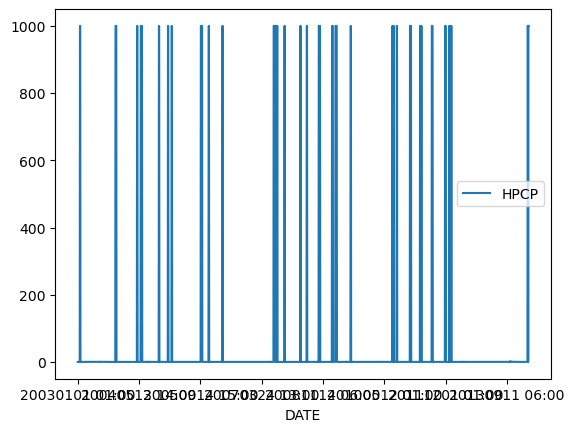

In [6]:
# clearly some nodata issues
boulder_df.plot(x = "DATE", y = "HPCP", title = "Daily Precipitation")

In [8]:
# Check METADATA (pdf)
# hourly, 99999 is missing data, date column not in datetime

# Adjust pandas reading
boulder_df = pd.read_csv(file_path, 
                         parse_dates = ["DATE"], 
                        na_values = [999.99], # note that HPCP is in float
                        index_col = ["DATE"])

# much better
boulder_df

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
...,...,...,...,...,...,...,...,...
2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,[,
2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,],
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,0.1,,


In [9]:
# numeric values only
boulder_df.describe()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1746.000000
mean,1650.5,40.033851,-105.281106,0.111856
std,0.0,0.000045,0.000005,0.093222
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,2.200000


<Axes: title={'center': 'Hourly Precipitation'}, xlabel='DATE'>

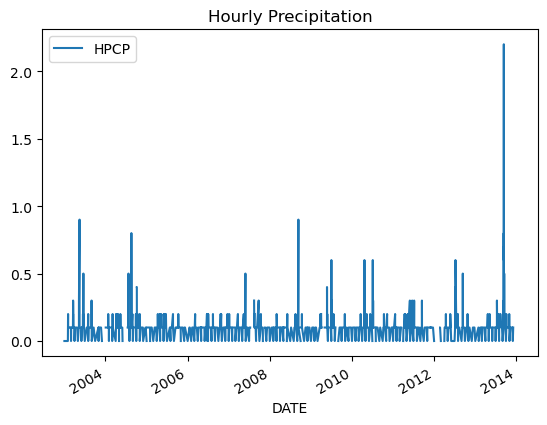

In [11]:
# If x is not specified, automatically assume that it's the index
boulder_df.plot(y = "HPCP", title = "Hourly Precipitation")

In [15]:
# subsetting data using index
# Note that you need to specify the specific date: df[start_date:end_date]
boulder_2005 = boulder_df['2005-01-01':'2005-12-31']

boulder_2005.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2005-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2005-01-02 06:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,{,
2005-01-02 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,},
2005-01-05 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-01-12 04:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


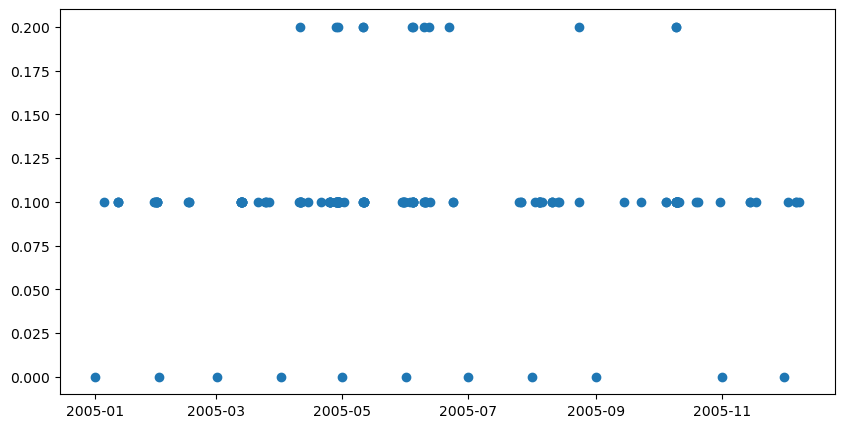

In [26]:
# Use matplotlib for more control
# Create scatter plot

fig, ax = plt.subplots(figsize = (10,5))

ax.scatter(boulder_2005.index, boulder_2005.HPCP);

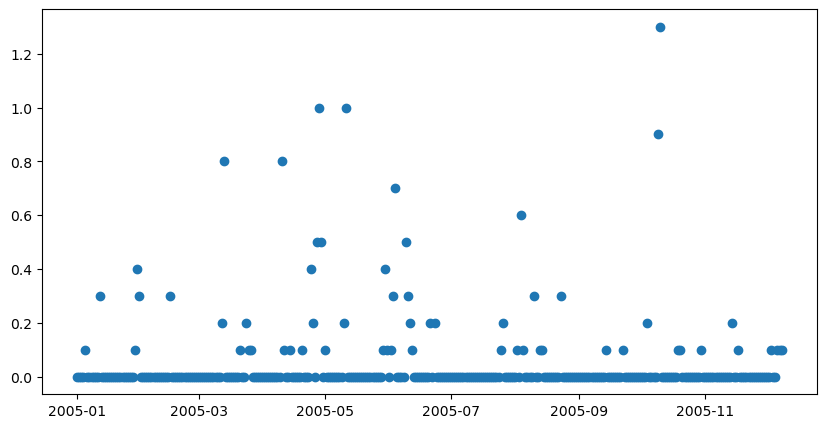

In [27]:
# Resample Time Series Data

# Resampling time series data refers to the act of summarizing data over different time periods. For example, 
# above you have been working with hourly data. However, you may want to plot data summarized by day.

# You can resample time series data in Pandas using the resample() method. Within that method you call the time 
# frequency for which you want to resample. Examples including day ("D") or week ("w").

# When you resample data, you need to also tell Python how you wish to summarize the data for that time period. For
# example do you want to sum or find the max value for each day?

# Sum of daily precipitation
boulder_2005_sum = boulder_2005.resample("D").sum()

fig, ax = plt.subplots(figsize = (10,5))

ax.scatter(boulder_2005_sum.index, boulder_2005_sum.HPCP);

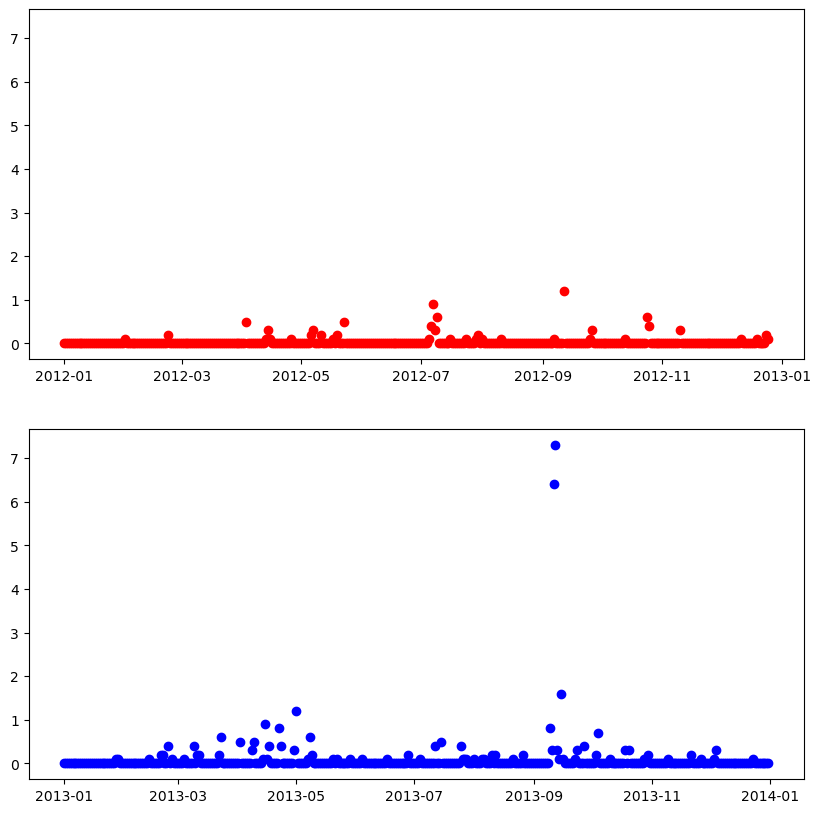

In [32]:
# Try plotting daily 2012 and 2013 data
boulder_2012 = boulder_df['2012-01-01':'2012-12-31'].resample("D").sum()
boulder_2013 = boulder_df['2013-01-01':'2013-12-31'].resample("D").sum()

# Use sharey to have appropriate scale
fig, axs = plt.subplots(nrows = 2, figsize = (10,10), sharey = True)

axs[0].scatter(boulder_2012.index, boulder_2012.HPCP, color = "red")
axs[1].scatter(boulder_2013.index, boulder_2013.HPCP, color = "blue");

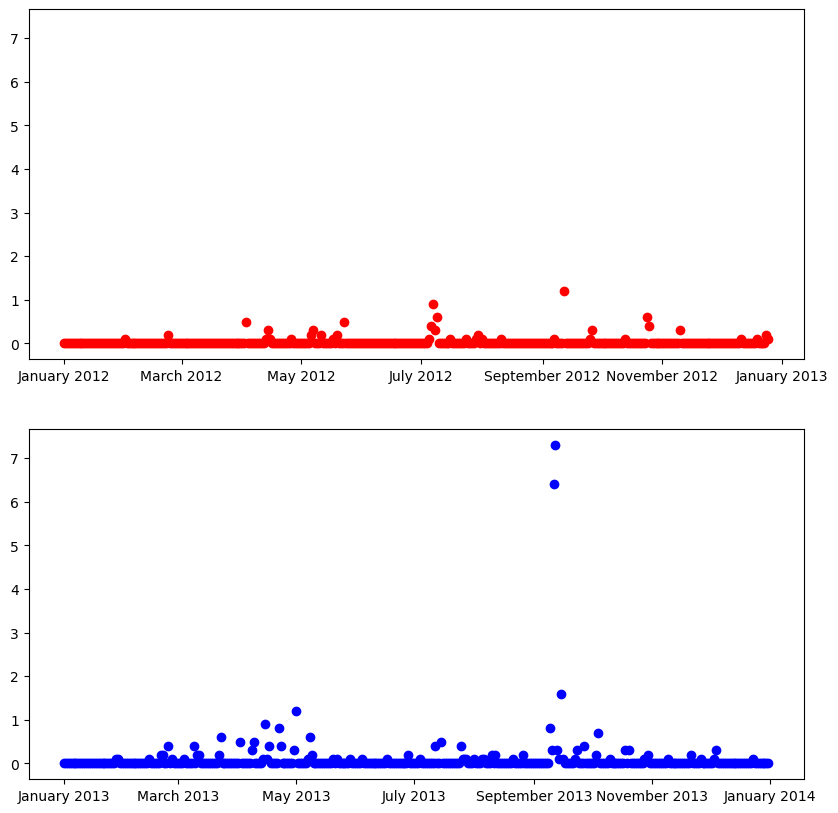

In [34]:
# You can use DateFormatter from matplotlib to get better date formatting
import matplotlib.dates as mdates

# Create a DateFormatter to format dates as "Month Year"
date_format = mdates.DateFormatter('%B %Y')  # %B for full month name, %Y for full year

# Use sharey to have appropriate scale
fig, axs = plt.subplots(nrows = 2, figsize = (10,10), sharey = True)

# Set the date formatter for the x-axis
axs[0].xaxis.set_major_formatter(date_format)
axs[1].xaxis.set_major_formatter(date_format)

axs[0].scatter(boulder_2012.index, boulder_2012.HPCP, color = "red")
axs[1].scatter(boulder_2013.index, boulder_2013.HPCP, color = "blue");

In [ ]:
### CHEAT SHEET FOR DATEFORMATTER
# Using the DateFormatter module from matplotlib, you can specify the format that you want to use for the date using
# the syntax: "%X %X" where each %X element represents a part of the date as follows:

#     %Y - 4 digit year with upper case Y
#     %y - 2 digit year with lower case y
#     %m - month as a number with lower case m
#     %b - month as abbreviated name with lower case b
#     %d - day with lower case d

# You can also add a character between the "%X %X" to specify how the values are connected in the label such as - or \.

# For example, using the syntax "%m-%d" would create labels that appears as month-day, such as 05-01 for May 1st.

In [35]:
f, ax = plt.subplots(figsize = (10,4))

ax.plot(boulder_df.index.month)

Index([ 1,  1,  2,  2,  3,  5,  5,  6,  7, 10,
       ...
        1,  3,  4,  4,  4, 22, 23, 23, 29, 31],
      dtype='int32', name='DATE', length=1840)

<Axes: xlabel='DATE'>

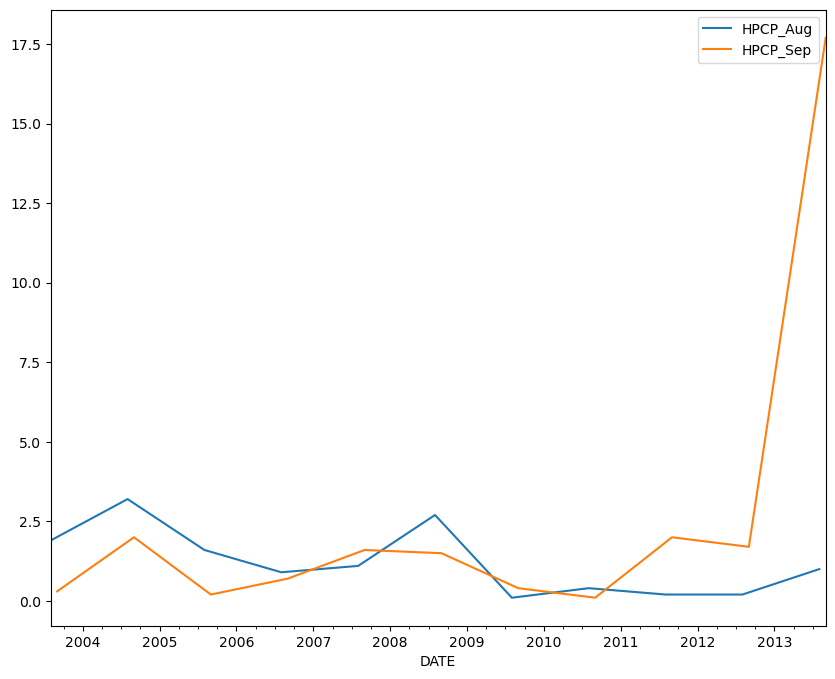

In [50]:
boulder_monthly = boulder_df.resample("M").sum()

boulder_aug = boulder_monthly[boulder_monthly.index.month == 8]
boulder_sep = boulder_monthly[boulder_monthly.index.month == 9]

f, ax = plt.subplots(figsize = (10,8))
boulder_aug.plot(y = "HPCP", ax = ax, label = "HPCP_Aug")
boulder_sep.plot(y = "HPCP", ax = ax, label = "HPCP_Sep")

(15918.0, 16009.0)

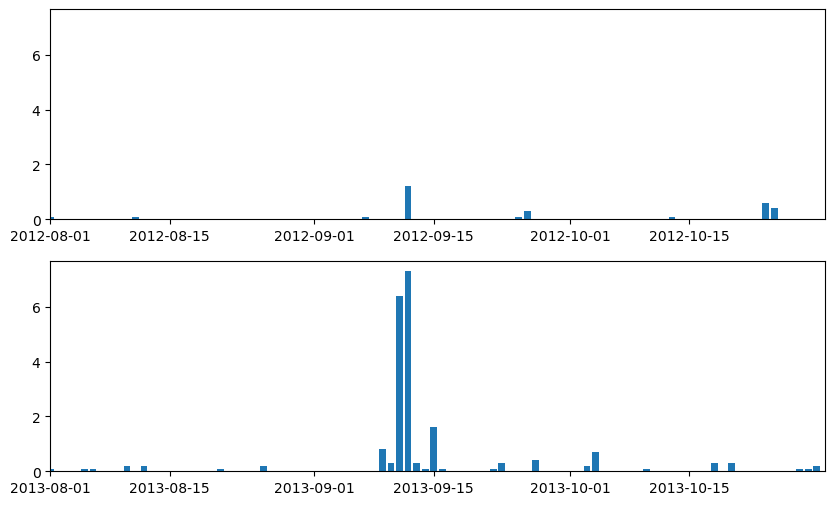

In [53]:
# Flood occurred in September 2013 - compare rainfall between Aug - Oct 2012/2013
boulder_2012 = boulder_df['2012-08-01':'2012-10-31'].resample("D").sum()
boulder_2013 = boulder_df['2013-08-01':'2013-10-31'].resample("D").sum()

f, axs = plt.subplots(nrows = 2, figsize = (10, 6), sharey = True)

axs[0].bar(boulder_2012.index, boulder_2012.HPCP)
axs[1].bar(boulder_2013.index, boulder_2013.HPCP)

# To set xlim with dates
start_date_2012 = pd.to_datetime('2012-08-01')
end_date_2012 = pd.to_datetime('2012-10-31')

start_date_2013 = pd.to_datetime('2013-08-01')
end_date_2013 = pd.to_datetime('2013-10-31')

axs[0].set_xlim(start_date_2012, end_date_2012)
axs[1].set_xlim(start_date_2013, end_date_2013)

In [54]:
# Check discharge metadata - Data collected daily, mean discharge measured in cubic feet per sec
discharge_fp = os.path.join(
    'colorado-flood',
    'discharge',
    '06730200-discharge-daily-1986-2013.csv'
)

# note that dates were not consistently reported - generally pandas can still handle this as long as its not ridiculous
discharge_df = pd.read_csv(discharge_fp, index_col = ['datetime'], parse_dates=['datetime'])

discharge_df.head()

C:\Users\tranq\AppData\Local\Temp\ipykernel_13088\1396217210.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  discharge_df = pd.read_csv(discharge_fp, index_col = ['datetime'], parse_dates=['datetime'])


,agency_cd,site_no,disValue,qualCode
datetime,,,,
1986-10-01,USGS,6730200,30.0,A
1986-10-02,USGS,6730200,30.0,A
1986-10-03,USGS,6730200,30.0,A
1986-10-04,USGS,6730200,30.0,A
1986-10-05,USGS,6730200,30.0,A


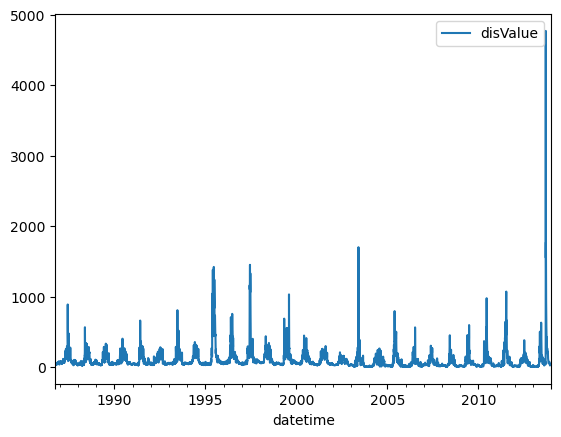

In [56]:
discharge_df.plot(y = "disValue");

In [64]:
# Date of maximum discharge
discharge_df[discharge_df.disValue == discharge_df.disValue.max()]

,agency_cd,site_no,disValue,qualCode
datetime,,,,
2013-09-12,USGS,6730200,4770.0,A


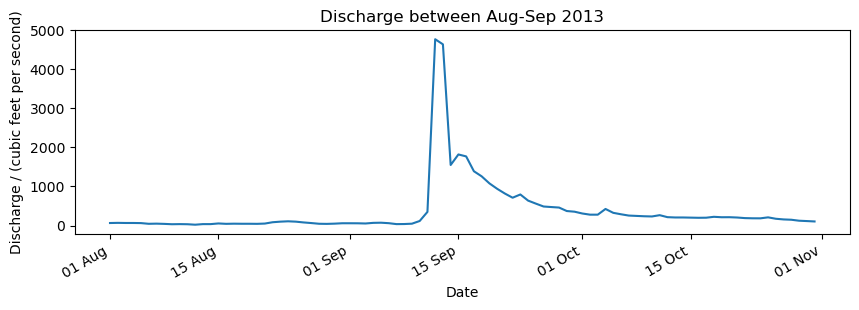

In [72]:
# Plot data only using Aug - Oct 2013
f, ax = plt.subplots(figsize = (10,3))

# automatically formats for datetime objects, very nice
f.autofmt_xdate()

subsample = discharge_df['2013-08-01':'2013-10-31']

ax.plot(subsample.index, subsample.disValue)
ax.set_title("Discharge between Aug-Sep 2013")
ax.set_ylabel("Discharge / (cubic feet per second)")

ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))

ax.set_xlabel("Date");

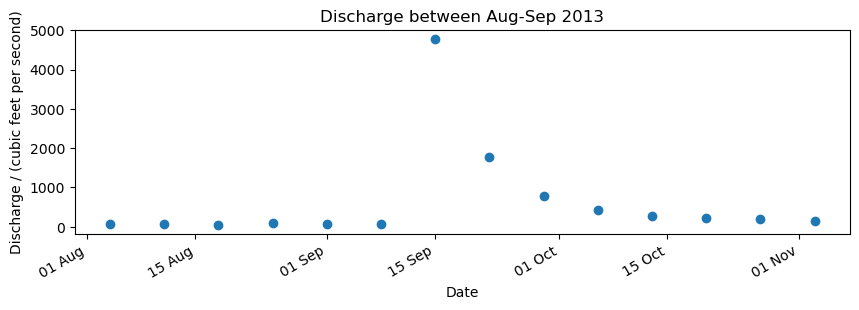

In [74]:
# Plot data only using Aug - Oct 2013
f, ax = plt.subplots(figsize = (10,3))

# automatically formats for datetime objects, very nice
f.autofmt_xdate()

# Resample by week
subsample = discharge_df['2013-08-01':'2013-10-31'].resample("W").max()

ax.scatter(subsample.index, subsample.disValue)
ax.set_title("Discharge between Aug-Sep 2013")
ax.set_ylabel("Discharge / (cubic feet per second)")

ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))

ax.set_xlabel("Date");

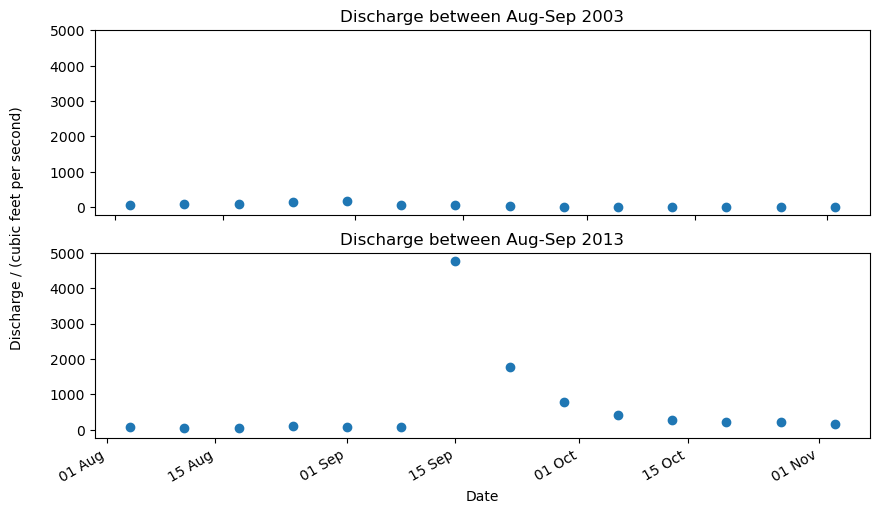

In [80]:
# Plot data only using Aug - Oct 2013
f, ax = plt.subplots(nrows = 2, figsize = (10,6), sharey = True)

# automatically formats for datetime objects, very nice
f.autofmt_xdate()

# Manually set ylabel
f.text(0.04, 0.55, 'Discharge / (cubic feet per second)', va='center', rotation='vertical')

# Resample by week
subsample_1 = discharge_df['2013-08-01':'2013-10-31'].resample("W").max()
subsample_2 = discharge_df['2003-08-01':'2003-10-31'].resample("W").max()



ax[0].scatter(subsample_2.index, subsample_2.disValue)
ax[0].set_title("Discharge between Aug-Sep 2003")

ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))

ax[1].scatter(subsample_1.index, subsample_1.disValue)
ax[1].set_title("Discharge between Aug-Sep 2013")

ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))

ax[1].set_xlabel("Date");

In [88]:
### HOW TO GET DATA FROM HYDROFUNCTIONS - allows you to get stream data from the USGS

import hydrofunctions as hf

# Define the site number and start and end dates that you are interested in
site = "06730500"
start = '1946-05-10'
end = '2023-08-29'

# Request data for that site and time period
longmont_resp = hf.get_nwis(site, 'dv', start, end)

# Convert the response to a json in order to use the extract_nwis_df function
longmont_resp = longmont_resp.json()

# Returns a pandas df AND a metadata dict
longmont_discharge, metadata = hf.extract_nwis_df(longmont_resp)

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=06730500&startDT=1946-05-10&endDT=2023-08-29


In [92]:
new_cols = {
    'USGS:06730500:00060:00003': "discharge",
    'USGS:06730500:00060:00003_qualifiers': "flag"
}

longmont_discharge = longmont_discharge.rename(columns = new_cols)

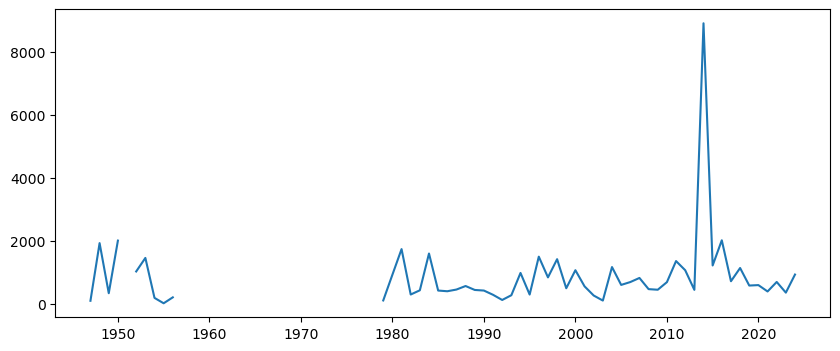

In [105]:
%matplotlib inline
# something weird happened here - I guess importing hydrofunctions must have changed the matplotlib kernel?

boulder_annual = longmont_discharge.resample("Y").max()

f, ax = plt.subplots(figsize = (10,4))

ax.plot(boulder_annual.index, boulder_annual.discharge)

In [123]:
# Compare precipitation and discharge on the same plot
discharge_subsample = longmont_discharge["2013-08-01":"2013-10-31"].resample("D").max()


file_path = os.path.join("colorado-flood",
                         "precipitation",
                         "805325-precip-daily-2003-2013.csv")

boulder_df = pd.read_csv(file_path, 
                         parse_dates = ["DATE"], 
                         na_values = [999.99], # note that HPCP is in float
                         index_col = ["DATE"])

precip_subsample = boulder_df["2013-08-01":"2013-10-31"].resample("D").sum()

# Timezone issues - can't join non-tz-aware datetime with tz-aware datetime
discharge_subsample.index = discharge_subsample.index.tz_convert("US/Mountain")
precip_subsample.index = precip_subsample.index.tz_localize("US/Mountain")

# Join - don't need to specify "on", will join on index
# Since the hours of measurement don't match up, resample both datasets to daily to remove hourly inconsistencies
boulder_data = discharge_subsample.resample("D").max().join(precip_subsample.resample("D").sum())

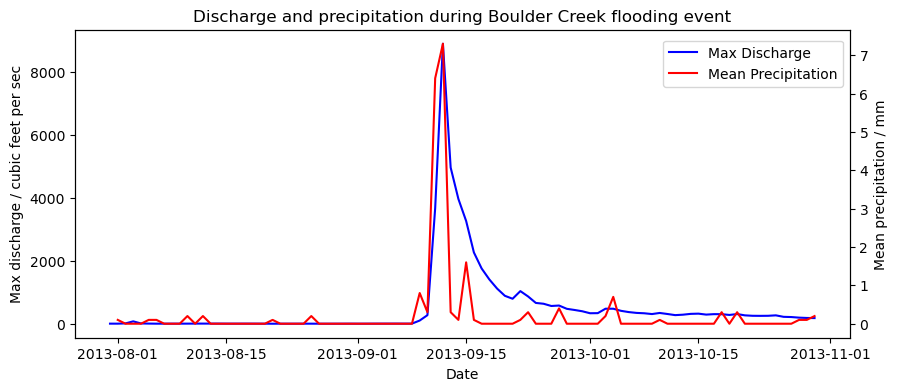

In [133]:
f, ax = plt.subplots(figsize = (10,4))

ax.set_title("Discharge and precipitation during Boulder Creek flooding event")
ax.plot(boulder_data.index, boulder_data.discharge, color = "blue", label = "Max Discharge")
ax.set_xlabel("Date")
ax.set_ylabel("Max discharge / cubic feet per sec")

ax1 = ax.twinx()

ax1.plot(boulder_data.index, boulder_data.HPCP, color = "red", label = "Mean Precipitation");
ax1.set_ylabel("Mean precipitation / mm")

f.legend(loc = "upper right", bbox_to_anchor=(.9, .87))



In [134]:
### Flood frequency analysis
# Two major terms:
#     Exceedance probability: the probability of a given magnitude event or greater to occur.
#     Recurrence interval: the average time of exceedance is the inverse of the exceedance probability.

# Important Considerations
#     The above definitions assume that flood events in the time series are independent (i.e., that event magnitudes
#     are not correlated with each other in time) and that the process is stationary (i.e., that the probability 
#     distribution of events is not changing through time).

# What is an Annual Exceedance Probability?

# The USGS and other agencies often refer to the percent chance of occurrence as an Annual Exceedance Probability or AEP.
# An AEP is always a fraction of one. So a 0.2 AEP flood has a 20% chance of occurring in any given year, and this
# corresponds to a 5-year recurrence-interval flood. Recurrence-interval terminology tends to be more understandable for 
# flood intensity comparisons. However, AEP terminology reminds the observer that a rare flood does not reduce the chances
# of another rare flood within a short time period.

# Hydrofunctions allows you to plot an interactive map of stream data
hf.draw_map()

In [136]:
# Define the site number and start and end dates that you are interested in
site = "06730500"
start = '1946-05-10'
end = '2023-08-29'

# Request data for that site and time period
longmont_resp = hf.get_nwis(site, 'dv', start, end)

# Convert the response to a json in order to use the extract_nwis_df function
longmont_resp = longmont_resp.json()

# Returns a pandas df AND a metadata dict
longmont_discharge, metadata = hf.extract_nwis_df(longmont_resp)

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=06730500&startDT=1946-05-10&endDT=2023-08-29


In [140]:
# By default, the column names contain the station ID - you want to keep this if you're dealing with lots of data
# This is daily data from the stream gages
new_cols = {
    'USGS:06730500:00060:00003': "discharge",
    'USGS:06730500:00060:00003_qualifiers': "flag"
}

longmont_discharge = longmont_discharge.rename(columns = new_cols)

longmont_discharge

,discharge,flag
datetimeUTC,,
1946-05-10 00:00:00+00:00,16.0,A
1946-05-11 00:00:00+00:00,19.0,A
1946-05-12 00:00:00+00:00,9.0,A
1946-05-13 00:00:00+00:00,3.0,A
1946-05-14 00:00:00+00:00,7.8,A
...,...,...
2023-08-25 00:00:00+00:00,17.0,P
2023-08-26 00:00:00+00:00,63.6,P
2023-08-27 00:00:00+00:00,30.4,P


In [163]:
# download usgs annual max data from figshare
# this data is tab-delimited and has a bunch of metadata at the top
import urllib

url = "https://nwis.waterdata.usgs.gov/nwis/peak?site_no=06730500&agency_cd=USGS&format=rdb"
download_path = os.path.join("colorado-flood", 
                             "downloads", "annual-peak-flow.txt")

urllib.request.urlretrieve(url, download_path)

('colorado-flood\\downloads\\annual-peak-flow.txt',
 <http.client.HTTPMessage at 0x209caeb1e50>)

In [164]:
with open(download_path) as f:
    count = 0
    lines = f.readlines()
    f.close()
    
count = 0
for line in lines:
    if line.startswith("#"):
        count += 1
        
print(count)

72


In [167]:
boulder_annual_max = pd.read_csv(download_path, 
            sep = '\t', 
            skiprows = 72, # number of metadata rows as determined above
            header = [0], # two lines for headers
            parse_dates = [2])

C:\Users\tranq\AppData\Local\Temp\ipykernel_13088\3453190983.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  boulder_annual_max = pd.read_csv(download_path,


In [186]:
# Get the series containing only 
boulder_annual_max_subset = boulder_annual_max.loc[1:, ["peak_dt", "peak_va"]]

# Need to convert peak_dt to datetime
boulder_annual_max_subset["date"] = pd.to_datetime(boulder_annual_max_subset["peak_dt"])

# Set as index
boulder_annual_max_subset.set_index("date", inplace = True)

# Check for any yearly duplicates
boulder_annual_max_subset["year"] = boulder_annual_max_subset.index.year

# Two duplicates, one in 1947 and another in 1993
boulder_annual_max_subset[boulder_annual_max_subset["year"].duplicated()]

,peak_dt,peak_va,year
date,,,
1947-10-15,1947-10-15,721,1947
1993-10-18,1993-10-18,497,1993


In [187]:
# Keep the larger _va
boulder_annual_max_subset = boulder_annual_max_subset.sort_values('peak_va', ascending=False).drop_duplicates('year').sort_index()

# Should be empty if no duplicates.
boulder_annual_max_subset[boulder_annual_max_subset["year"].duplicated()]

,peak_dt,peak_va,year
date,,,


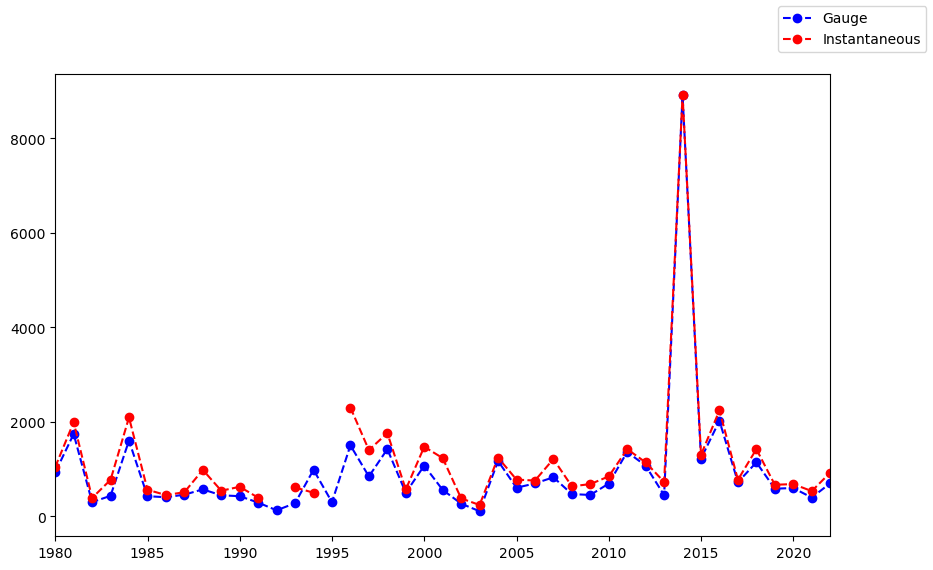

In [210]:
# Compare the gage yearly max vs. instanteous max from USGS
f, ax = plt.subplots(figsize = (10,6))

# boulder_annual_max_subset.index = boulder_annual_max_subset.index.tz_localize("US/Mountain")
longmont_annual = longmont_discharge.resample("Y").max()
boulder = boulder_annual_max_subset.resample("Y").max()

boulder["max"] = boulder.peak_va.astype(float)

ax.plot(longmont_annual.index, longmont_annual.discharge, marker = "o", linestyle = "--", color = "blue", label = "Gauge")
ax.plot(boulder.index, boulder["max"], marker = "o", linestyle = "--", color = "red", label = "Instantaneous")
ax.set_xlim(pd.to_datetime("1980"), pd.to_datetime("2022"))

f.legend()

In [211]:
# longmont
# Mean daily streamflow: Mean daily streamflow is useful because it is a complete time series (except for days when the 
#     gage fails) and thus retains all recorded streamflow events over the period of record.

# boulder
# Annual maximum instantaneous streamflow: Instantaneous data is not averaged over the entire day, but instead reflects 
#     continuous variations in the flood hydrograph recorded by the stream gage. As such, annual maximum instantaneous 
#     streamflow data are useful because they retain the maximum values of discharge recorded in a given year.

In [219]:
# Calculate exceedance probability using the following formula:

# prob = (n - i + 1) / (n + 1)
# n = total number of observations
# i = rank of observation (ascending discharge)

import numpy as np

longmont_sorted = longmont_annual.dropna().sort_values("discharge", ascending = True)

n = longmont_sorted.shape[0]

longmont_sorted["rank"] = np.arange(1, n + 1)

longmont_sorted

,discharge,flag,rank
datetimeUTC,,,
1954-12-31 00:00:00+00:00,20.0,A,1
1946-12-31 00:00:00+00:00,99.0,A,2
2002-12-31 00:00:00+00:00,106.0,"A,e",3
1978-12-31 00:00:00+00:00,110.0,hf.missing,4
1991-12-31 00:00:00+00:00,125.0,hf.missing,5
1953-12-31 00:00:00+00:00,191.0,A,6
1955-12-31 00:00:00+00:00,208.0,hf.missing,7
2001-12-31 00:00:00+00:00,266.0,"A,e",8
1992-12-31 00:00:00+00:00,276.0,A,9


In [224]:
longmont_sorted["prob"] = longmont_sorted["rank"].apply(lambda x: (n - x + 1) / (n + 1))
longmont_sorted["return-years"] = 1 / longmont_sorted["prob"]

In [229]:
# do the same for boulder
boulder_sorted = boulder.dropna().sort_values("max", ascending = True)

n = boulder_sorted.shape[0]

boulder_sorted["rank"] = np.arange(1, n + 1)
boulder_sorted["prob"] = boulder_sorted["rank"].apply(lambda x: (n - x + 1) / (n + 1))
boulder_sorted["return-years"] = 1 / boulder_sorted["prob"]

boulder_sorted.tail()

,peak_dt,peak_va,year,max,rank,prob,return-years
date,,,,,,,
1983-12-31 00:00:00-07:00,1983-05-19,2090,1983.0,2090.0,65,0.071429,14.000000
2015-12-31 00:00:00-07:00,2015-05-09,2240,2015.0,2240.0,66,0.057143,17.500000
1995-12-31 00:00:00-07:00,1995-05-17,2300,1995.0,2300.0,67,0.042857,23.333333
1938-12-31 00:00:00-07:00,1938-09-03,4410,1938.0,4410.0,68,0.028571,35.000000
2013-12-31 00:00:00-07:00,2013-09-13,8910,2013.0,8910.0,69,0.014286,70.000000


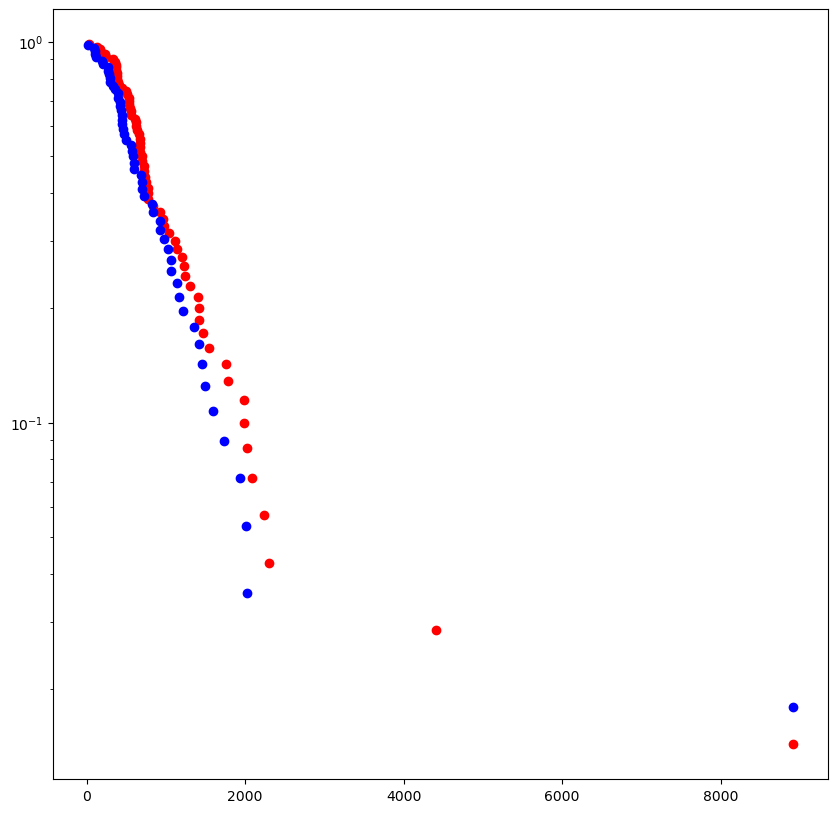

In [231]:
# plot these results on a log-log graph

f, ax = plt.subplots(figsize = (10,10))

ax.scatter(boulder_sorted["max"], boulder_sorted["prob"], color = "red", label = "USGS Annual Max Calculated")
ax.scatter(longmont_sorted["discharge"], longmont_sorted["prob"], color = "blue", label = "Daily Mean Calculated")

ax.set_yscale("log")

In [232]:
# The cumsum() function can be used to calculate total runoff - can compare to precipitation to get an idea of 
# evapotranspiration rates

# Convert site drainage area to square km
miles_km = 2.58999
site_drainage = 447
longmont_area = site_drainage * miles_km

print("The site drainage area in square km =", longmont_area)

The site drainage area in square km = 1157.72553


In [247]:
# Discharge is in cubic feet per second - convert to cubic feet per day

longmont_discharge = longmont_discharge['2000-01-01':'2023-01-01']

convert_to_cub_m_day = (60*60*24) * 0.0283168
convert_to_runoff = convert_to_cub_feet_day / (longmont_area * 1000000)

# MAR - Mean Annual Runoff
longmont_discharge["cum-sum-vol"] = longmont_discharge['discharge'].cumsum() * convert_to_runoff

longmont_discharge.head()

C:\Users\tranq\AppData\Local\Temp\ipykernel_13088\2269011631.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  longmont_discharge["cum-sum-vol"] = longmont_discharge['discharge'].cumsum() * convert_to_runoff


,discharge,flag,cum-sum-vol
datetimeUTC,,,
2000-01-01 00:00:00+00:00,67.0,A,0.005000
2000-01-02 00:00:00+00:00,81.0,A,0.011045
2000-01-03 00:00:00+00:00,76.0,A,0.016717
2000-01-04 00:00:00+00:00,102.0,A,0.024329
2000-01-05 00:00:00+00:00,79.0,A,0.030225


Text(0, 0.5, 'Cumulative Runoff in the Drainage area / cubic m per sq. m')

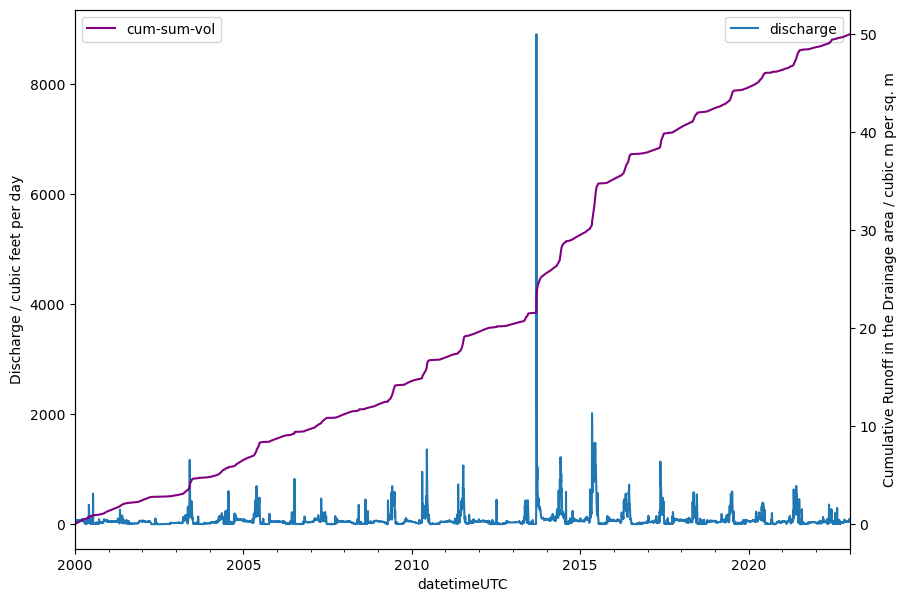

In [249]:
# Plot discharge over time 
f, ax = plt.subplots(figsize = (10,7))

longmont_discharge['2000-01-01':'2023-01-01'].plot(ax = ax, y = "discharge")
ax.set_ylabel("Discharge / cubic feet per day")

ax1 = ax.twinx()

longmont_discharge['2000-01-01':'2023-01-01'].plot(ax = ax1, y = "cum-sum-vol", color = "purple")
ax1.set_ylabel("Cumulative Runoff in the Drainage area / cubic m per sq. m")